In [2]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Title')

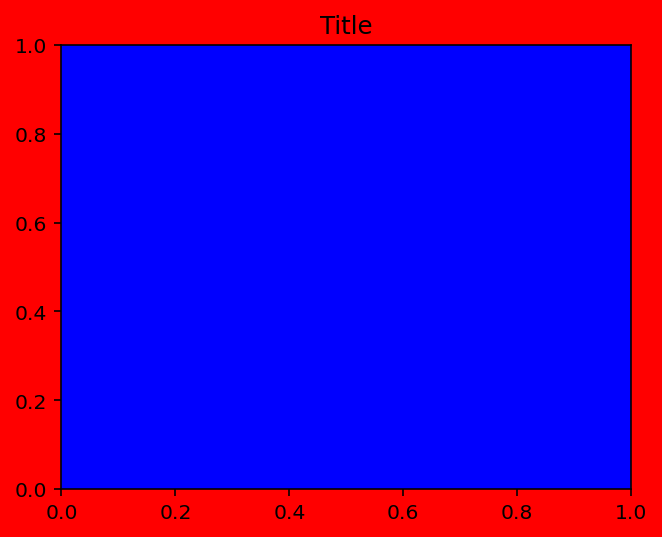

In [3]:
ax, figure = plt.subplots(figsize=(5, 4), dpi=147)
ax.set_facecolor('red')
figure.set_facecolor('blue')
figure.set_title('Title')

In [4]:
ax.

SyntaxError: invalid syntax (<ipython-input-4-03778a321bf7>, line 1)

In [5]:
%matplotlib inline

In [6]:
figure

<AxesSubplot:title={'center':'Title'}>

In [7]:
figure

<AxesSubplot:title={'center':'Title'}>

<AxesSubplot:>

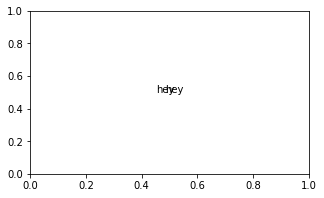

In [8]:
ax, fig = plt.subplots(figsize=(5, 3))
ax.text(.5, .5, 'hey', horizontalalignment='left')
ax.text(.5, .5, 'hey', horizontalalignment='center')
fig

<AxesSubplot:>

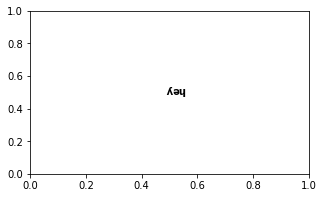

In [9]:
ax, fig = plt.subplots(figsize=(5, 3))
ax.text(.5, .5, 'hey', horizontalalignment='left', rotation=180, fontweight='bold')
fig

<AxesSubplot:>

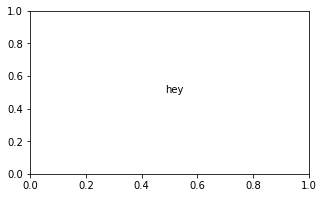

In [10]:
ax, fig = plt.subplots(figsize=(5, 3))
s = ax.text(.5, .5, 'hey')
fig

In [11]:
s.set_color('red')
fig

<AxesSubplot:>

In [12]:
import pandas as pd

In [13]:
housing = pd.read_csv('./data/housing.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
housing['rel_area'] = housing['TotalBsmtSF'] + housing['GrLivArea'] + housing['GarageArea']
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,rel_area
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,3114
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2984
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,3314
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,3115
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,4179


In [15]:
pd.cut(housing['rel_area'], 20)

0       (2901.2, 3543.0]
1       (2901.2, 3543.0]
2       (2901.2, 3543.0]
3       (2901.2, 3543.0]
4       (3543.0, 4184.8]
              ...       
1455    (2901.2, 3543.0]
1456    (3543.0, 4184.8]
1457    (3543.0, 4184.8]
1458    (2259.4, 2901.2]
1459    (2259.4, 2901.2]
Name: rel_area, Length: 1460, dtype: category
Categories (20, interval[float64]): [(321.164, 975.8] < (975.8, 1617.6] < (1617.6, 2259.4] < (2259.4, 2901.2] ... (10602.8, 11244.6] < (11244.6, 11886.4] < (11886.4, 12528.2] < (12528.2, 13170.0]]

In [16]:
import numpy as np

In [17]:
bins = np.arange(housing['rel_area'].min(), housing['rel_area'].max(), 100)

In [18]:
housing['binned'] = pd.cut(housing['rel_area'], rng)
housing.head()

NameError: name 'rng' is not defined

In [ ]:
housing.groupby('binned').agg({'SalePrice': 'max'}).reset_index()

In [ ]:
housing.info()

In [19]:
cols = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', 
        'OverallQual', 'Neighborhood', 'SalePrice']
housing = pd.read_csv('./data/housing.csv', usecols=cols)
housing.head()

,Neighborhood,OverallQual,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
0,CollgCr,7,856,1710,548,208500
1,Veenker,6,1262,1262,460,181500
2,CollgCr,7,920,1786,608,223500
3,Crawfor,7,756,1717,642,140000
4,NoRidge,8,1145,2198,836,250000


In [20]:
housing = housing.round({'TotalBsmtSF': -2})
b = housing.groupby('TotalBsmtSF').agg(avg_sp=('SalePrice', 'mean'))
g = housing.groupby('GarageArea').agg(avg_sp=("SalePrice", 'mean'))
l = housing.groupby('GrLivArea').agg(avg_sp=("SalePrice", 'mean'))

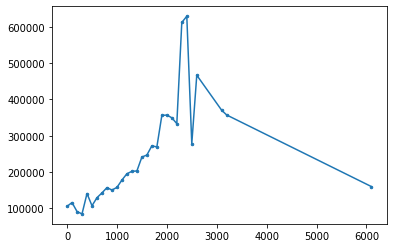

In [21]:
fig, ax = plt.subplots()
ax.plot(b, marker='.', ms=5)

In [22]:
housing

,Neighborhood,OverallQual,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
0,CollgCr,7,900,1710,548,208500
1,Veenker,6,1300,1262,460,181500
2,CollgCr,7,900,1786,608,223500
3,Crawfor,7,800,1717,642,140000
4,NoRidge,8,1100,2198,836,250000
...,...,...,...,...,...,...
1455,Gilbert,6,1000,1647,460,175000
1456,NWAmes,6,1500,2073,500,210000
1457,Crawfor,7,1200,2340,252,266500
1458,NAmes,5,1100,1078,240,142125


In [23]:
bikes = pd.read_csv('./data/bikes.csv')
bikes.head()

,trip_id,gender,starttime,stoptime,tripduration,from_station_name,dpcapacity_start,to_station_name,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
0,7147,Male,2013-06-28 19:01:00,2013-06-28 19:17:00,993,Lake Shore Dr & Monroe St,11.0,Michigan Ave & Oak St,15.0,73.9,10.0,12.7,-9999.0,mostlycloudy
1,7524,Male,2013-06-28 22:53:00,2013-06-28 23:03:00,623,Clinton St & Washington Blvd,31.0,Wells St & Walton St,19.0,69.1,10.0,6.9,-9999.0,partlycloudy
2,10927,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,15.0,Dearborn St & Monroe St,23.0,73.0,10.0,16.1,-9999.0,mostlycloudy
3,12907,Male,2013-07-01 10:05:00,2013-07-01 10:16:00,667,Carpenter St & Huron St,19.0,Clark St & Randolph St,31.0,72.0,10.0,16.1,-9999.0,mostlycloudy
4,13168,Male,2013-07-01 11:16:00,2013-07-01 11:18:00,130,Damen Ave & Pierce Ave,19.0,Damen Ave & Pierce Ave,19.0,73.0,10.0,17.3,-9999.0,partlycloudy


In [24]:
sample = bikes.sample(500)
sample.shape

(500, 14)

In [25]:
sample['rank'] = sample['tripduration'].rank(pct=True)
sample.head()

,trip_id,gender,starttime,stoptime,tripduration,from_station_name,dpcapacity_start,to_station_name,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events,rank
143,142264,Male,2013-08-02 13:59:00,2013-08-02 14:05:00,350,Franklin St & Chicago Ave,23.0,Larrabee St & Kingsbury St,27.0,81.0,10.0,11.5,-9999.0,mostlycloudy,0.242
15187,6421284,Female,2015-07-23 13:24:00,2015-07-23 13:37:00,738,Hampden Ct & Diversey Pkwy,19.0,Southport Ave & Roscoe St,19.0,84.0,10.0,3.5,-9999.0,mostlycloudy,0.626
47174,16737360,Female,2017-10-01 11:39:00,2017-10-01 11:51:00,733,Clark St & Wrightwood Ave,15.0,Wells St & Evergreen Ave,19.0,66.0,10.0,11.5,-9999.0,mostlycloudy,0.620
49824,17469873,Male,2017-12-13 17:33:00,2017-12-13 17:37:00,232,Clark St & Randolph St,39.0,Clinton St & Madison St,31.0,30.9,10.0,27.6,-9999.0,cloudy,0.102
33429,12471855,Male,2016-10-24 06:50:21,2016-10-24 07:05:23,902,Larrabee St & Menomonee St,15.0,Daley Center Plaza,39.0,45.0,10.0,8.1,-9999.0,partlycloudy,0.737


In [26]:
bot = sample.loc[sample['rank'] < .95]
bot2 = bot.copy()

In [40]:
bot2['gender'] = bot['gender'].astype('category')
bot2['gender_codes'] = bot2['gender'].cat.codes
gender_cat = bot2['gender'].cat.categories.tolist()
gender_cat

['Female', 'Male']

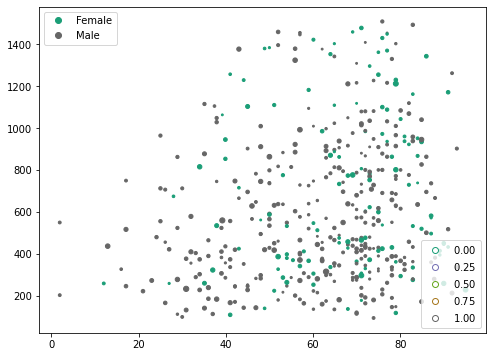

In [53]:
fig, ax = plt.subplots(figsize=(8, 6))
so = ax.scatter(data=bot2, x='temperature', y='tripduration', s='wind_speed', c='gender_codes', cmap='Dark2')
handles_colors, labels_colors = so.legend_elements('colors')
handles_sizes, labels_sizes = so.legend_elements('colors', num=4, mfc='white')
legend = ax.legend(handles=handles_colors, labels=gender_cat, loc='upper left')
ax.legend(handles=handles_sizes, labels=labels_sizes, loc='lower right')
ax.add_artist(legend)
ax.set_ylabel='Trip Duration'
ax.set_xlabel='Temperature'

In [114]:
bot2['trip_duration'].len()

KeyError: 'trip_duration'

In [122]:
!pip install --upgrade matplotlib

    100% |████████████████████████████████| 8.5MB 5.8MB/s 
    100% |████████████████████████████████| 2.2MB 11.5MB/s 
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0
  Found existing installation: matplotlib 3.0.2
    Uninstalling matplotlib-3.0.2:
      Successfully uninstalled matplotlib-3.0.2
